#### import packages

In [1]:
import sys
sys.path.append("../../")

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from cellmating.io import imread, imsave
from cellmating.cells import create_cells_from_image_for_patch
from cellmating.patch import DynamicPatch
from cellmating.plot._plotimage import plot_patch_intensity
from cellmating.patch import Singal
from cellmating.colormap import COLOR_BlackPink
from cellmating.plot._playplot import PlayPlot

#### patch

In [4]:
# Set the image path here.
file_path = "../../20230829_YLM21_YLM44_dynamic_2h_ON_merge_08_R3D_f_0000_id_1067.tif"
image = imread(file_path)

# Reorder the dimensions of the 'image' array to follow the Time x Channel x Width x Height order. 
# image = np.moveaxis(image, -1, 1)

In [5]:
# Set the cell ID you want to measure here.
org_label = 1067 # int(filename.split("_")[-1][:-4])

label = org_label%1000
cells = create_cells_from_image_for_patch((image[:,-1]))
c = cells[label]
c.tracking_mask = image[:,-1]%1000
c.reference_image = image[:,0]
c.fluorescence_image = image[:,1:-2]
patch = DynamicPatch.from_cell(c)
intensity_data = patch.periphery_patch_intensity(percentile=80, channel=[0,1])

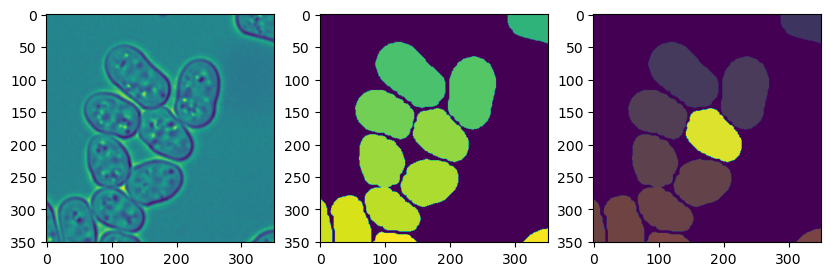

In [6]:
fig, axs = plt.subplots(1,3,figsize=(10, 5))
axs[0].imshow(patch.reference_image[0])
axs[1].imshow(patch.tracking_mask[0])
axs[2].imshow(patch.tracking_mask[0]==label)
axs[2].imshow(patch.tracking_mask[0], alpha=0.3)

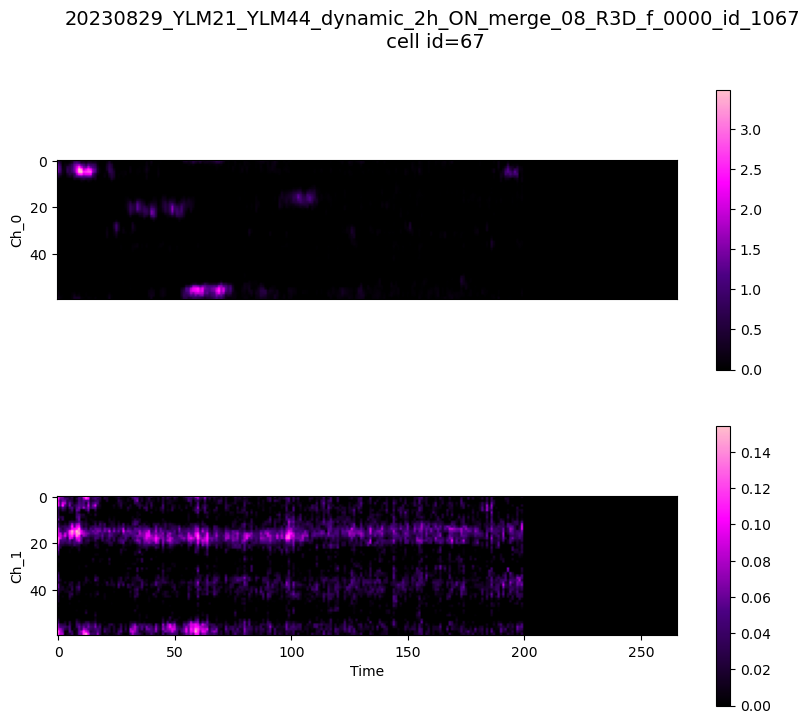

In [7]:
show_data = np.moveaxis(patch.normlized_intensity, -1, 0)
plot_patch_intensity(show_data, title=os.path.basename(file_path)[:-4]+"\n cell id="+str(patch.id))

In [8]:
signal_patch = Singal(data=intensity_data[:,:,0],
                      angles=patch.angle_,
                      frames=patch.frames,
                      coordinates = np.array(list(patch.coordinates_)),
                      background=patch.background[:,0],
                      name=file_path,)

# Set the threshold.
_ = signal_patch.binary_mask_cal(threshold=0.3)

# Set the cluster.
_ = signal_patch.cluster_patches(bandwidth=25)

steps = signal_patch.transfer_steps()
time_steps = signal_patch.transfer_steps_keep_time()

/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/threadpoolctl.py:762: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [9]:
feature = pd.DataFrame(signal_patch.patch_feature,  columns=["time_start", "time_ median", "time_end",
                                                             "coord_start", "coord_median", "coord_end",
                                                             "anlge_min", "angle_median", "angle_max",
                                                               "mass_x", "mass_y",])
feature["cluster_label"] = signal_patch.cluster.labels_
feature

time_start  time_ median  time_end  coord_start  coord_median  coord_end  \
0          0.0           0.0       1.0          2.0           3.0        5.0   
1          4.0          10.0      17.0          2.0           4.0        6.0   
2         21.0          23.0      24.0          2.0           5.0        7.0   
3         24.0          25.0      26.0         28.0          29.0       30.0   
4         30.0          36.0      42.0         19.0          21.0       24.0   
5         45.0          49.0      53.0         18.0          21.0       24.0   
6         54.0          64.0      75.0         54.0          56.0       59.0   
7         87.0          88.0      89.0         55.0          57.0       59.0   
8         98.0          98.0      98.0         17.0          17.0       17.0   
9        100.0         105.0     110.0         14.0          16.0       19.0   
10       126.0         126.0     126.0         30.0          30.0       31.0   
11       130.0         130.0     130.0         55.0          56.0       57.0   
12       151.0         151.0     151.0         28.0          28.0       29.0   
13       173.0         173.0     173.0         51.0          51.0       52.0   
14       186.0         186.0     186.0         36.0          36.0       36.0   
15       192.0         194.0     197.0          3.0           5.0        7.0   

    anlge_min  angle_median  angle_max      mass_x      mass_y  cluster_label  
0    0.188292      0.274704   0.464894  148.500000  159.828039              0  
1    0.187718      0.368239   0.563003  146.500000  162.488496              0  
2    0.187476      0.462491   0.661395  146.500000  167.222395              0  
3    2.985514      3.064758   3.168866  215.469216  228.030784              2  
4    2.127586      2.327956   2.618874  181.812372  224.312372              1  
5    1.970665      2.318300   2.590391  182.044618  224.500000              1  
6    5.786380      5.983911   6.267101  171.102350  148.500000              0  
7    5.883397      6.088822   6.267069  166.677709  148.500000              0  
8    1.894548      1.894548   1.894548  170.308406  210.808406              1  
9    1.413064      1.706195   2.149709  167.298392  206.500000              1  
10   3.146620      3.146620   3.240291  218.518282  226.981718              2  
11   5.884401      5.984654   6.086091  169.638872  145.500000              0  
12   2.987662      2.987662   3.074364  212.644189  230.500000              2  
13   5.492865      5.492865   5.599311  191.809165  145.500000              0  
14   3.637486      3.637486   3.637486  226.500000  202.698383              3  
15   0.258252      0.429986   0.627251  145.500000  166.212502              0

In [10]:
trans_dict = signal_patch.transfer_heat_map()
trans_dict

{'map': array([[3., 1., 2., 1.],
        [1., 2., 1., 0.],
        [2., 1., 0., 0.],
        [1., 0., 0., 0.]]),
 'tips': array([ True, False,  True, False]),
 'angle': array([170.60836488, 120.68922368, 175.59767641, 208.4125757 ])}

In [11]:
# Set the output file path for saving the tables. By default, the output filename is derived by appending "_feature.csv" 
# and "heatmap.csv" to the base name of the original image file.

save_path = file_path
feature.to_csv(save_path[:-4]+"_feature.csv")
pd.DataFrame(trans_dict["map"]).to_csv(save_path[:-4]+"_heatmap.csv")

#### plot results

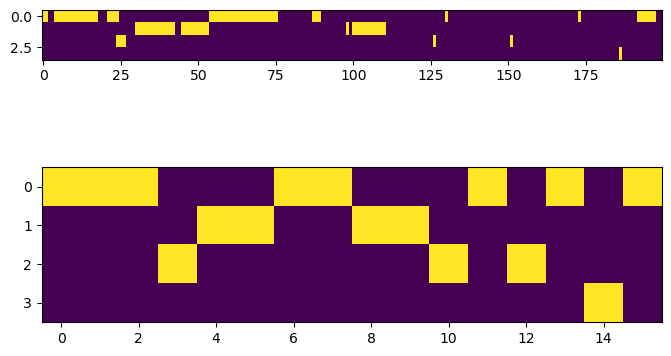

In [12]:
fig,ax = plt.subplots(2, 1, figsize=(8,5))
ax[0].imshow(time_steps[:200].T)
ax[0].set_aspect(4)
ax[1].imshow(steps.T)

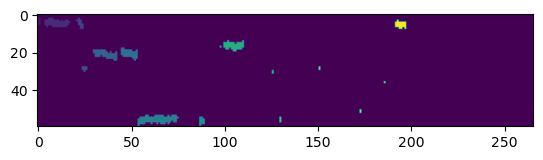

In [13]:
plt.imshow(signal_patch._mask_org.T)

In [14]:
import matplotlib as mpl
colors = [(202, 58, 32), (241, 165, 58), (15, 42, 212),(74, 162, 46),(249, 222, 75),(63, 142, 239),(128, 186, 56),(247, 240, 220),(151, 200, 233),(79, 174, 167),(135, 235, 233)]
colors_gaudi=[]
for a,b,c in colors:
    colors_gaudi.append((a/255,b/255,c/255))
COLOR_Gaudi = mpl.colors.ListedColormap(colors_gaudi)

In [15]:
x = np.array([np.linspace(1,60,60,dtype=int) for i in range(0, 266)])
data ={
    "intensity_1":{
        "data": [x, patch.normlized_intensity[:,:,0]],
        "figure": "plot"
    },
    "fluorescent":{
        "data": patch.fluorescence_image[:,0,:,:],
        "figure": "imshow",
    }
}

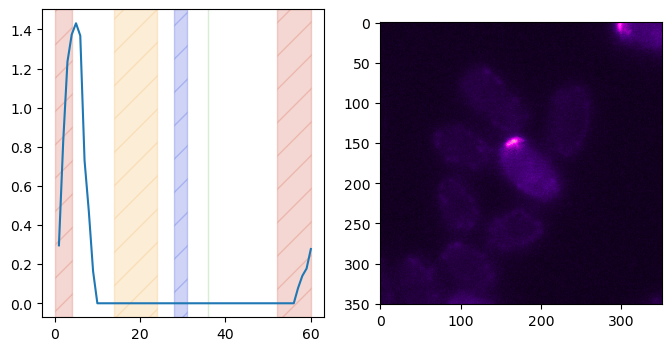

In [16]:
plot = PlayPlot(data=data, nrows=1, ncols=2, nframe=266, figsize=(8,4))
plot.lines[1].set_cmap(COLOR_BlackPink)

for i in np.unique(signal_patch.cluster.labels_):
    s = feature[feature["cluster_label"] == i].coord_start.min()
    e = feature[feature["cluster_label"] == i].coord_end.max()
    if e - s > 30:
        s = feature[feature["cluster_label"] == 0].coord_start 
        s = s[s < 30].max()
        e = feature[feature["cluster_label"] == 0].coord_end 
        e = e[e > 30].min()
        plot.axs[0].axvspan(0, s+1, alpha=0.2, color=colors_gaudi[i], hatch="/")
        plot.axs[0].axvspan(e, 60, alpha=0.2, color=colors_gaudi[i], hatch="/")
    else:
        plot.axs[0].axvspan(s, e, alpha=0.2, color=colors_gaudi[i], hatch="/")

In [18]:
anim = plot.play()
from IPython.display import HTML
HTML(anim.to_html5_video())